This Notebook shows the training of the model against half of our data(sept 2024 to dec 2024). 20% of the data is used for training and 80% is used for testing.

Setting the absolute path at the root directory of the repo.

In [1]:
import sys
import os
sys.path.append(os.path.abspath('..'))

Loading in the scripts and their methods

In [2]:
from Scripts.load_plot_blk_data import load_blk_variables
from Scripts.load_plot_cactus_data import parse_cactus_file
from Scripts.train_cme_classifier import train_cme_prediction_model, save_model, evaluate_cme_windows
from Scripts.visualize_model_outputs import plot_weighted_signal

initializing the variables

In [3]:
data = load_blk_variables('../data/Training_data/*.cdf', -1e31)
cme_times = (parse_cactus_file('../data/cmesept2024.txt') + 
             parse_cactus_file('../data/cmeoct2024.txt') + 
             parse_cactus_file('../data/cmenov2024.txt') +
             parse_cactus_file('../data/cmedec2024.txt')
            )

Training the model and saving it as a .pkl file.

In [4]:
df, clf, weights = train_cme_prediction_model(data, cme_times)
save_model(clf)

Plotting the weighted signal, predicted CME, Actual CME and Weighted signal.

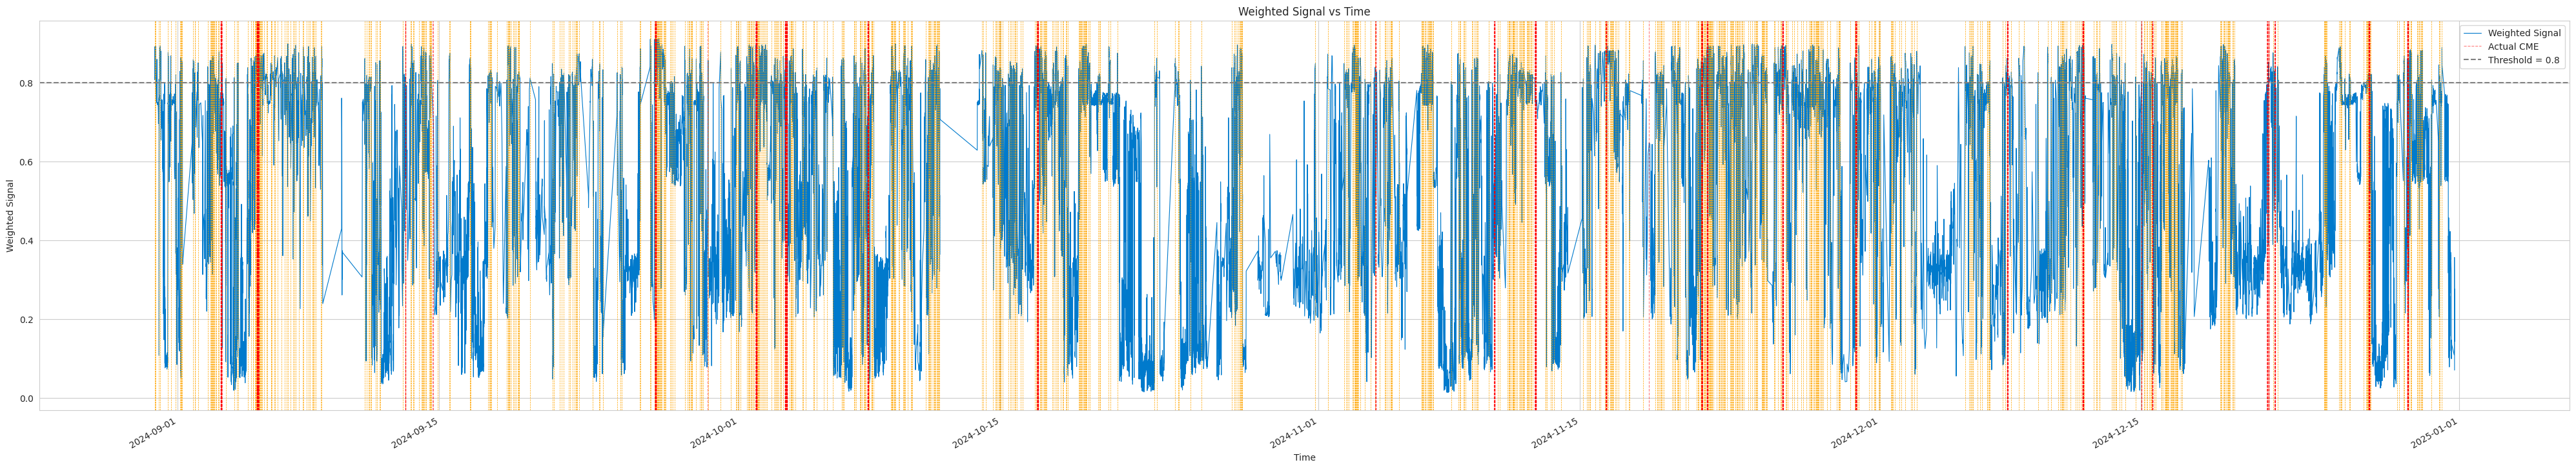

In [5]:
plot_weighted_signal(df,threshold = 0.8)

Model performance:

In [6]:
evaluate_cme_windows(df, cme_times)


=== CME Window Evaluation ===
Detection Rate: 80.95%
